In [5]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


With object oriented

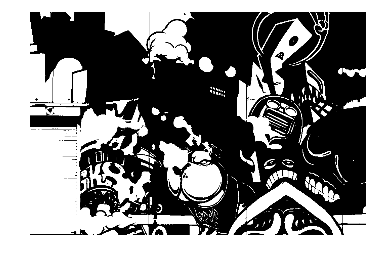

In [7]:
testdata_images_path = '../tests/images/Binary/'
testdata_features_path = '../tests/features/Binary/'

image = cv2.imread('../tests/images/Color/binarized_125.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(image)

In [8]:
matfile = sio.loadmat('../tests/features/Color/binarized_125_binregions.mat')
masks = matfile['saliency_masks'] * 255
holes_matlab = masks[:,:, 0]
islands_matlab = masks[:,:, 1]
indents_matlab = masks[:,:, 2]
prots_matlab = masks[:,:, 3]

In [10]:
SE = sio.loadmat(('../tests/features/Color/SE_125.mat'))['SE_n']
lam = 45
area_factor = 0.03
connectivity = 4
binarydetector = sr.BinaryDetector(SE=SE, lam=lam, area_factor=area_factor, 
                                                connectivity=connectivity)

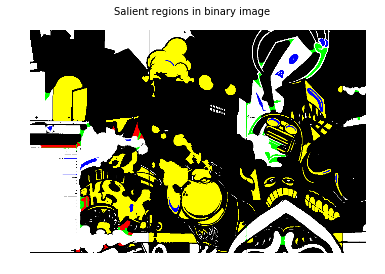

In [11]:
results = binarydetector.detect(image, find_holes=True, find_islands=True,
       find_indentations=True, find_protrusions=True, visualize=True)

In [12]:
holes_my = results['holes']
islands_my = results['islands']
indents_my = results['indentations']
prots_my = results['protrusions']

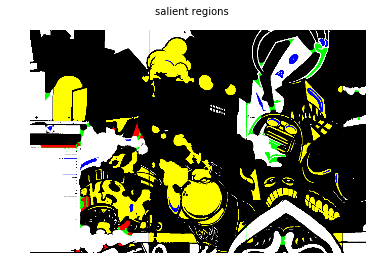

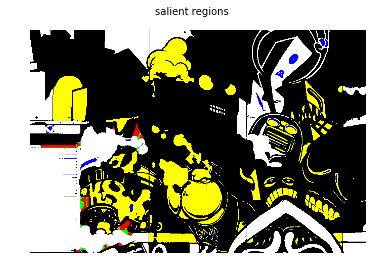

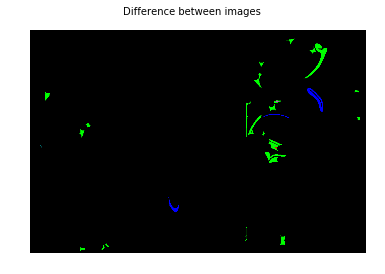

False

In [13]:
elements_visualized = sr.visualize_elements(image, holes=holes_my, islands=islands_my, 
                                            indentations=indents_my, protrusions=prots_my)
trueelements_visualized = sr.visualize_elements(image, 
                                             holes=holes_matlab, islands=islands_matlab,
                                               indentations=indents_matlab, protrusions=prots_matlab)
sr.image_diff(elements_visualized, trueelements_visualized)

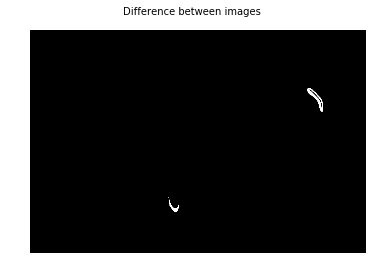

holes are correct: False


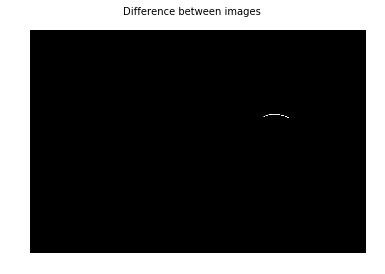

islands are correct: False


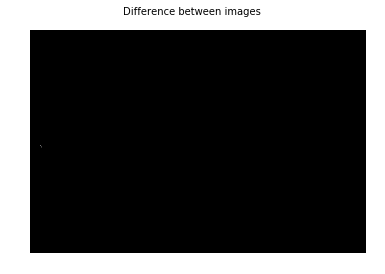

protrusions are correct: False


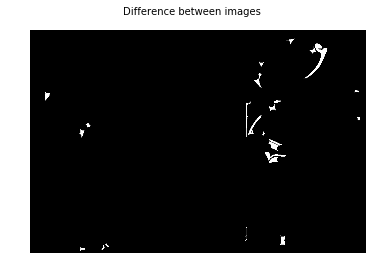

indentations are correct: False


In [14]:
print('holes are correct:', sr.image_diff(holes_matlab, holes_my))
print('islands are correct:', sr.image_diff(islands_matlab, islands_my))
print('protrusions are correct:', sr.image_diff(prots_matlab, prots_my))
print('indentations are correct:', sr.image_diff(indents_matlab, indents_my))

## compare filled images

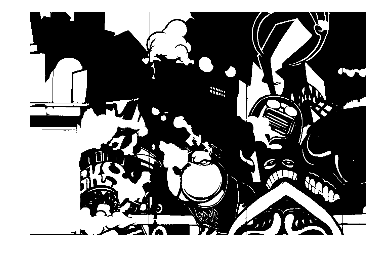

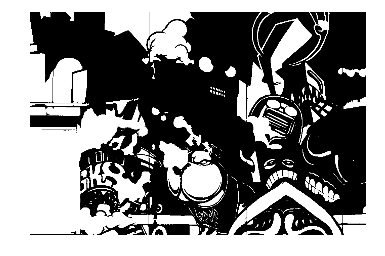

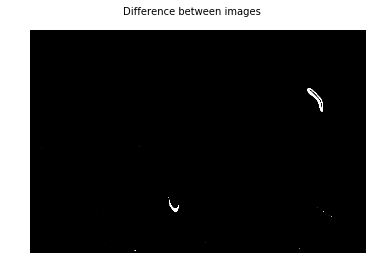

False


In [16]:
filled_my = binarydetector._filled
filled_matlab = cv2.imread('../tests/features/Color/filled_binarised_125.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(filled_my)
sr.show_image(filled_matlab)
print(sr.image_diff(filled_my, filled_matlab))

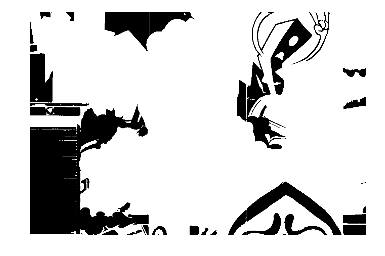

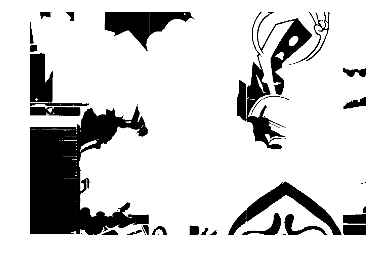

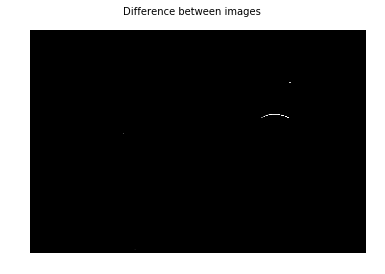

False


In [17]:
inv_filled_my = binarydetector._invfilled
inv_filled_matlab = cv2.imread('../tests/features/Color/filled_binarised_125_inverse.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(inv_filled_my)
sr.show_image(inv_filled_matlab)
print(sr.image_diff(inv_filled_my, inv_filled_matlab))